In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy import stats
from scipy.stats import linregress
from api_keys import api_key

In [64]:
music_df = pd.read_csv("resources/spotify-2023.csv", encoding='latin-1')
music_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [65]:
music_df = music_df.dropna(how='any')
music_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [9]:
#rapid api deezer
# Set up your rapidAPI key and URL for deezer
headers = {
    "X-RapidAPI-Key": "api_key",
	"X-RapidAPI-Host": "deezerdevs-deezer.p.rapidapi.com"
}

url = "https://deezerdevs-deezer.p.rapidapi.com/search"

# Create an empty list to store the deezer album IDs:
d_album_id= []

# Loop through the DataFrame
for index, row in music_df.iterrows():
    title = row['track_name']

    # Set up the parameters for the API call
    querystring = {"q":title}
    
    #print("Processing track:",title)
    # Make the API request
    response = requests.get(url, headers=headers, params=querystring)
    
    # Check if the request was successful
    if response.status_code == 200:
        data_response = response.json()
        pretty_data = json.dumps(data_response, indent=2)
        #print(data_response.keys())
        #print(pretty_data)
        #check if data is a list with at least one item
        if "data" in data_response and len(data_response["data"]) > 0:
            # Extract the album id from the API response
            album_id = int(data_response["data"][0]["album"]["id"])
            #print(album_id)
            d_album_id.append(album_id)
        else:
            #print(track_name, "not found")
            d_album_id.append(0)
    else:
            #print("Error processing track", album_id)
            d_album_id.append(0)


In [11]:
# Add the 'd_album_id' column to the DataFrame
music_df['Deezer Album ID'] = d_album_id

# Print the DataFrame to see the results
music_df.tail(20)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,Deezer Album ID
933,Vigilante Shit,Taylor Swift,1,2022,10,21,1948,0,253650850,12,...,E,Minor,80,16,28,17,0,12,39,368474187
934,Question...?,Taylor Swift,1,2022,10,21,1608,0,223064273,10,...,G,Major,75,11,50,20,0,30,17,368474187
935,On BS,"Drake, 21 Savage",2,2022,11,4,1338,0,170413877,9,...,A,Major,84,33,36,2,0,39,59,372625207
936,Mastermind,Taylor Swift,1,2022,10,21,1936,0,218320587,7,...,E,Major,66,12,35,55,0,9,14,368474187
937,Circo Loco,"Drake, 21 Savage",2,2022,11,4,1794,0,141720999,26,...,C#,Major,73,25,61,1,0,32,7,372625207
938,Labyrinth,Taylor Swift,1,2022,10,21,1597,0,187339835,6,...,NaN,Major,48,15,31,80,22,12,4,368474187
939,Spin Bout U,"Drake, 21 Savage",2,2022,11,4,1652,2,198365537,26,...,G,Major,77,20,70,1,0,16,5,372625207
940,Sweet Nothing,Taylor Swift,1,2022,10,21,1747,0,186104310,9,...,NaN,Major,34,39,16,97,0,12,5,5969222
941,"Would've, Could've, Should've",Taylor Swift,1,2022,10,21,1715,0,177503916,4,...,G,Major,48,55,84,43,0,15,12,368506677
942,Con La Brisa,"Ludwig Goransson, Foudeqush",2,2022,11,4,486,0,71095708,8,...,D,Minor,62,25,44,51,33,14,3,373539777


In [12]:
#export to csv:
music_df.to_csv("resources/album_id.csv", encoding = "Latin-1", index=False, header=True)

In [2]:
#read in saved data
music_df=pd.read_csv("resources/album_id.csv", encoding = "Latin-1")
music_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,Deezer Album ID,Deezer Genre
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,Major,80,89,83,31,0,8,4,463574485,Asian Music
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,Major,71,61,74,7,0,10,4,410083687,Rap/Hip Hop
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,Major,51,32,53,17,0,31,6,484372295,Pop
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,Major,55,58,72,11,0,11,15,108447472,Pop
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,Minor,65,23,80,14,63,11,6,442984025,Latin Music


In [35]:
#rapid api deezer to find genre based on album id
# Set up your rapidAPI key and URL for deezer
headers = {
	"X-RapidAPI-Key": "api_key",
	"X-RapidAPI-Host": "deezerdevs-deezer.p.rapidapi.com"
}

# Create an empty list to store the deezer album IDs:
d_genre= []

# Loop through the DataFrame
for index, row in music_df.iterrows():
    deezer_id = row['Deezer Album ID']

    url = "https://deezerdevs-deezer.p.rapidapi.com/album/"+ str(deezer_id)

    #print("Processing album:", deezer_id)
    # Make the API request
    response = requests.get(url, headers=headers)
    
    # Check if the request was successful
    if response.status_code == 200:
        id_response = response.json()
        pretty_data = json.dumps(id_response, indent=2)
 
        #check if data is a list with at least one item
        try:
            # Extract the album id from the API response
            genre_find = id_response["genres"]["data"][0]["name"]
            d_genre.append(genre_find)
            #print(genre_find)
        except:
            #print(track_name, "not found")
            d_genre.append(None)
    else:
            #print("Error processing album", deezer_id)
            d_genre.append(None)


In [42]:
# Add the 'd_album_id' column to the DataFrame
music_df['Deezer Genre'] = d_genre

# Print the DataFrame to see the results
music_df.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,Deezer Album ID,Deezer Genre
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,Major,80,89,83,31,0,8,4,463574485,Asian Music
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,Major,71,61,74,7,0,10,4,410083687,Rap/Hip Hop
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,Major,51,32,53,17,0,31,6,484372295,Pop
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,Major,55,58,72,11,0,11,15,108447472,Pop
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,Minor,65,23,80,14,63,11,6,442984025,Latin Music
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,Major,92,66,58,19,0,8,24,447914165,Rap/Hip Hop
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,Minor,67,83,76,48,0,8,3,418111007,Traditional Mexicano
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,Major,67,26,71,37,0,11,4,459659375,Reggaeton
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,Minor,85,22,62,12,0,28,9,453946145,Rap/Hip Hop
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,Minor,81,56,48,21,0,8,33,382919757,Rap/Hip Hop


In [43]:
#export to csv:
music_df.to_csv("resources/all_data_genre.csv", encoding = "Latin-1", index=False, header=True)

In [2]:
#read the saved data:
music_df=pd.read_csv("resources/all_data_genre.csv", encoding = "Latin-1")
music_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,Deezer Album ID,Deezer Genre
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,Major,80,89,83,31,0,8,4,463574485,Asian Music
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,Major,71,61,74,7,0,10,4,410083687,Rap/Hip Hop
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,Major,51,32,53,17,0,31,6,484372295,Pop
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,Major,55,58,72,11,0,11,15,108447472,Pop
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,Minor,65,23,80,14,63,11,6,442984025,Latin Music


# Question 1- 

## Spotify Music Number 1

In [7]:
music_df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'Deezer Album ID', 'Deezer Genre'],
      dtype='object')

In [3]:
no1_spotify= music_df.loc[music_df["in_spotify_charts"]== 1]
no1_spotify.dropna(how='any')
no1_spotify

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,Deezer Album ID,Deezer Genre
196,Hummingbird (Metro Boomin & James Blake),"James Blake, Metro Boomin",2,2023,6,2,277,1,39666245,1,...,Major,59,26,60,46,1,25,13,448581475,Rap/Hip Hop
221,Mejor Que Yo,"Mambo Kingz, DJ Luian, Anuel Aa",3,2023,5,4,675,1,50847624,9,...,Minor,62,56,66,18,0,12,5,434186667,Reggaeton
447,Malvadï¿½ï¿,"Xamï¿½ï¿½, Gustah, Neo B",3,2021,11,30,648,1,240684449,14,...,Minor,82,52,61,38,0,14,27,0,NaN
485,ELEVEN,IVE,1,2021,12,1,521,1,247737946,17,...,Major,83,59,73,6,0,5,11,276725452,Asian Music
559,"Cayï¿½ï¿½ La Noche (feat. Cruz Cafunï¿½ï¿½, Ab...","Quevedo, La Pantera, Juseph, Cruz Cafunï¿½ï¿½,...",7,2022,1,14,1034,1,245400167,19,...,Minor,67,74,75,44,0,7,30,0,NaN
564,HUMBLE.,Kendrick Lamar,1,2017,3,30,33206,1,1929770265,284,...,Minor,91,42,60,0,0,9,12,39949511,Rap/Hip Hop
585,Adore You,Harry Styles,1,2019,12,6,13454,1,1439191367,246,...,Major,68,57,77,2,0,10,5,122664252,Pop
616,X ï¿½ï¿½LTIMA,"Daddy Yankee, Bad Bunny",2,2022,3,25,2697,1,349746291,55,...,Major,81,59,83,9,0,11,5,0,NaN
639,Golden,Harry Styles,1,2019,12,13,8429,1,807015863,85,...,Minor,45,25,84,21,0,13,6,122664252,Pop
666,Un Verano Sin Ti,Bad Bunny,1,2022,5,6,1004,1,283332261,8,...,Minor,50,41,50,69,0,12,6,316164367,Latin Music


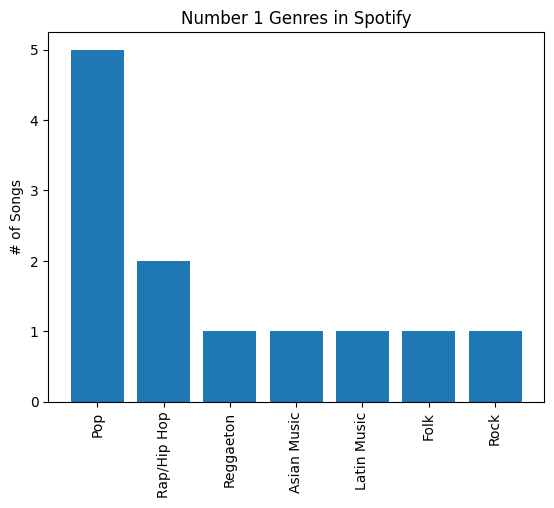

In [37]:
no1_spotify_genre= no1_spotify["Deezer Genre"].value_counts()
plt.bar(no1_spotify_genre.index,no1_spotify_genre)
plt.xticks(rotation=90)
plt.title("Number 1 Genres in Spotify")
plt.ylabel("# of Songs")
plt.savefig("output/Number 1 Genre in Spotify_Q1.png")
plt.show()

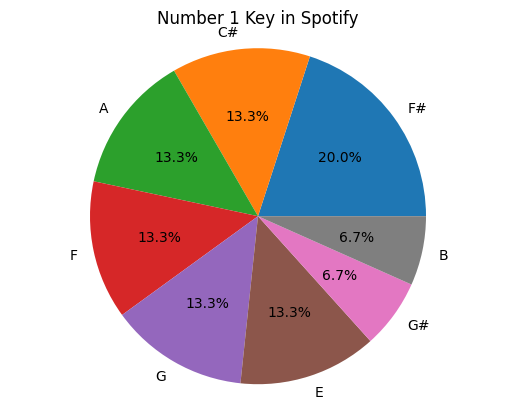

In [36]:
## Make a pie graph for no1 spotify key 
no1_spotify_key= no1_spotify["key"].value_counts()
plt.pie(no1_spotify_key, labels=no1_spotify_key.index, autopct='%1.1f%%')
plt.axis("equal")
plt.title("Number 1 Key in Spotify")
plt.savefig("output/Number 1 Key in Spotify_Q1.png")
plt.show()

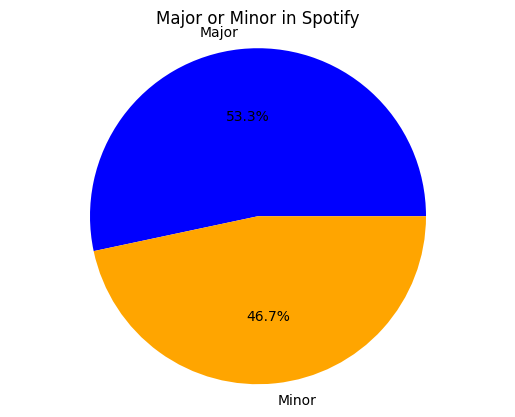

In [35]:
## Major or minor
no1_spotify_mode=no1_spotify["mode"].value_counts()
color=["blue","orange"]
plt.pie(no1_spotify_mode,labels=no1_spotify_mode.index,colors=color,autopct='%1.1f%%')
plt.axis("equal")
plt.title("Major or Minor in Spotify")
plt.savefig("output/Major or Minor in Spotify_Q1.png")
plt.show()

In [32]:
## Make a list for Spotify bpm
sbpm_0to59=[]
sbpm_60to79=[]
sbpm_80to99=[]
sbpm_100to119=[]
sbpm_120to139=[]
sbpm_140to159=[]
sbpm_160to179=[]
sbpm_180to200=[]
for index, row in no1_spotify.iterrows():
    bpm = row['bpm']
    if bpm >= 0 and bpm <= 59:
        sbpm_0to59.append(row)
    elif bpm >= 60 and bpm <= 79:
        sbpm_60to79.append(row)
    elif bpm >= 80 and bpm <= 99:
        sbpm_80to99.append(row)
    elif bpm >= 100 and bpm <= 119:
        sbpm_100to119.append(row)
    elif bpm >= 120 and bpm <= 139:
        sbpm_120to139.append(row)
    elif bpm >= 140 and bpm <= 159:
        sbpm_140to159.append(row)
    elif bpm >= 160 and bpm <= 179:
        sbpm_160to179.append(row)
    elif bpm >= 180 and bpm <= 200:
        sbpm_180to200.append(row)
    

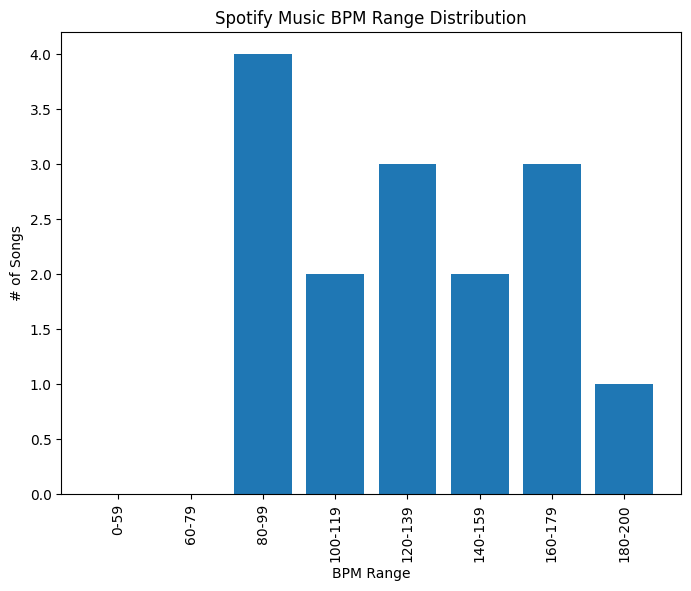

In [34]:
## Make a bar chart on the Spotify music bpm
bpm_ranges = ['0-59', '60-79', '80-99', '100-119', '120-139', '140-159', '160-179', '180-200']
counts = [len(sbpm_0to59), len(sbpm_60to79), len(sbpm_80to99), len(sbpm_100to119),
          len(sbpm_120to139), len(sbpm_140to159), len(sbpm_160to179), len(sbpm_180to200)]
plt.figure(figsize=(8, 6))
plt.bar(bpm_ranges, counts)
plt.xlabel("BPM Range")
plt.ylabel("# of Songs")
plt.title("Spotify Music BPM Range Distribution")
plt.xticks(rotation=90)
plt.savefig("output/Spotify BPM Range Distribution_Q1.png")
plt.show()

## APPLE Music Number 1

In [9]:
no1_apple=music_df.loc[music_df["in_apple_charts"]==1]
no1_apple.dropna(how='any')
no1_apple.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,Deezer Album ID,Deezer Genre
247,Lovers Rock,TV Girl,1,2014,6,5,6339,13,466231982,3,...,Minor,56,57,87,0,1,10,4,318676647,Pop
266,SORRY NOT SORRY,"Tyler, The Creator",2,2023,3,31,709,0,58473276,8,...,Minor,48,50,80,40,0,37,20,67115762,Pop
314,Zona De Perigo,Leo Santana,1,2022,12,8,531,4,134294498,20,...,Major,81,97,77,75,0,35,3,387589897,Brazilian Music
318,Sem Alianï¿½ï¿½a no,"MC Xenon, Os Gemeos da Putaria",2,2022,12,23,454,4,93587665,6,...,Major,53,40,36,73,0,11,33,0,NaN
341,"Hey, Mickey!",Baby Tate,1,2016,9,27,482,0,122763672,9,...,Major,92,73,51,55,0,15,6,459773235,Rap/Hip Hop


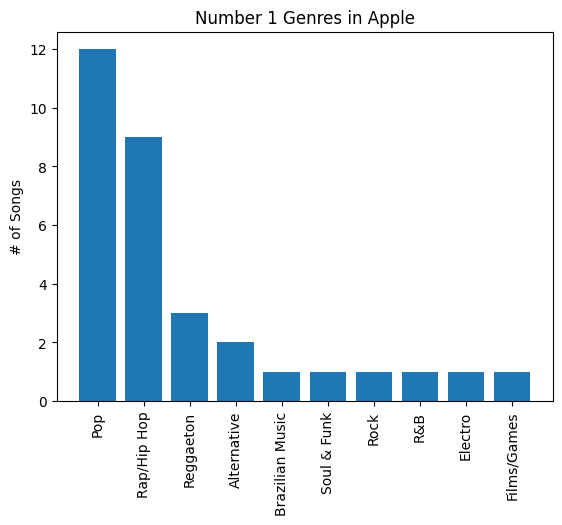

In [31]:
## Make a bar graph for no 1 apple music genre
no1_apple_genre= no1_apple["Deezer Genre"].value_counts()
plt.bar(no1_apple_genre.index,no1_apple_genre)
plt.xticks(rotation=90)
plt.title("Number 1 Genres in Apple")
plt.ylabel("# of Songs")
plt.savefig("output/Number 1 Genre in Apple_Q1.png")
plt.show()

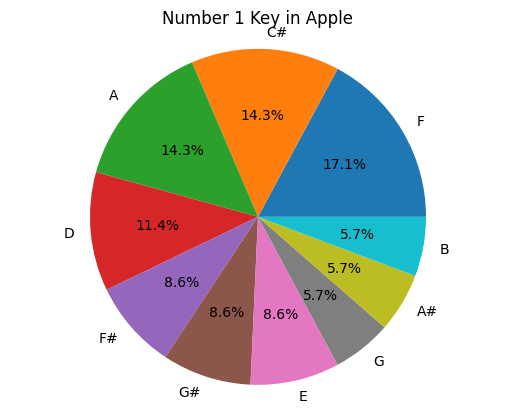

In [29]:
## Make a pie graph for no 1 apple music key
no1_apple_key= no1_apple["key"].value_counts()
plt.pie(no1_apple_key, labels=no1_apple_key.index, autopct='%1.1f%%')
plt.axis("equal")
plt.title("Number 1 Key in Apple")
plt.savefig("output/Number 1 Key in Apple_Q1.png")
plt.show()

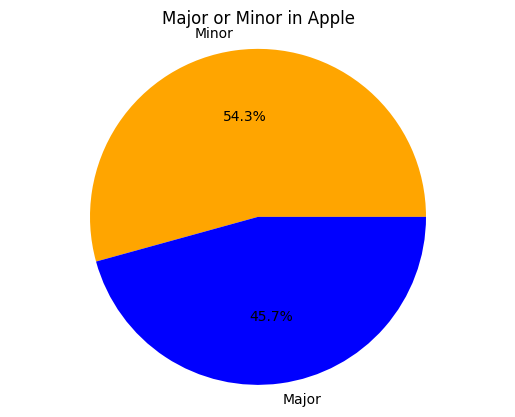

In [28]:
## Major or minor
no1_apple_mode=no1_apple["mode"].value_counts()
color=["orange","blue"]
plt.pie(no1_apple_mode,labels=no1_apple_mode.index,colors=color,autopct='%1.1f%%')
plt.axis("equal")
plt.title("Major or Minor in Apple")
plt.savefig("output/Major or Minor in Apple_Q1.png")
plt.show()

In [26]:
## Make a list for Apple bpm
abpm_0to59=[]
abpm_60to79=[]
abpm_80to99=[]
abpm_100to119=[]
abpm_120to139=[]
abpm_140to159=[]
abpm_160to179=[]
abpm_180to200=[]
for index, row in no1_apple.iterrows():
    bpm = row['bpm']
    if bpm >= 0 and bpm <= 59:
        abpm_0to59.append(row)
    elif bpm >= 60 and bpm <= 79:
        abpm_60to79.append(row)
    elif bpm >= 80 and bpm <= 99:
        abpm_80to99.append(row)
    elif bpm >= 100 and bpm <= 119:
        abpm_100to119.append(row)
    elif bpm >= 120 and bpm <= 139:
        abpm_120to139.append(row)
    elif bpm >= 140 and bpm <= 159:
        abpm_140to159.append(row)
    elif bpm >= 160 and bpm <= 179:
        abpm_160to179.append(row)
    elif bpm >= 180 and bpm <= 200:
        abpm_180to200.append(row)
    

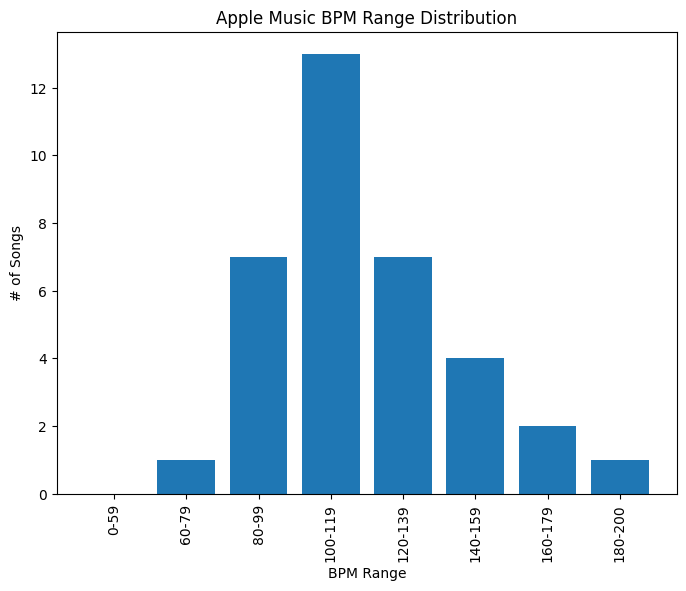

In [27]:
## Make a bar chart on the Apple music bpm
bpm_ranges = ['0-59', '60-79', '80-99', '100-119', '120-139', '140-159', '160-179', '180-200']
counts = [len(abpm_0to59), len(abpm_60to79), len(abpm_80to99), len(abpm_100to119),
          len(abpm_120to139), len(abpm_140to159), len(abpm_160to179), len(abpm_180to200)]
plt.figure(figsize=(8, 6))
plt.bar(bpm_ranges, counts)
plt.xlabel("BPM Range")
plt.ylabel("# of Songs")
plt.title("Apple Music BPM Range Distribution")
plt.xticks(rotation=90)
plt.savefig("output/Apple BPM Range Distribution_Q1.png")
plt.show()

## DEEZER Music Number 1

In [14]:
no1_deezer=music_df.loc[music_df["in_deezer_charts"]==1]
no1_deezer.dropna(how='any')
no1_deezer

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,Deezer Album ID,Deezer Genre
18,I Can See You (Taylorï¿½ï¿½ï¿½s Version) (From...,Taylor Swift,1,2023,7,7,516,38,52135248,73,...,Major,69,82,76,6,0,6,3,0,NaN
24,Last Night,Morgan Wallen,1,2023,1,31,2420,19,429829812,52,...,Major,52,52,68,46,0,15,4,402287647,Country
26,Rush,Troye Sivan,1,2023,7,13,864,78,22581161,71,...,Minor,74,35,84,0,0,11,6,349702977,NaN
38,See You Again,"Tyler, The Creator, Kali Uchis",3,2017,7,21,13387,64,1047101291,77,...,Major,56,58,56,37,0,11,10,44730061,Rap/Hip Hop
39,Angels Like You,Miley Cyrus,1,2020,11,27,3372,19,570515054,65,...,Major,67,49,64,10,0,10,3,188375252,Pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,Sin Seï¿½ï,"Ovy On The Drums, Quevedo",2,2022,7,22,1097,2,209106362,18,...,Minor,82,75,85,33,1,11,4,202081742,Classical
785,THE LONELIEST,Mï¿½ï¿½ne,1,2022,10,7,1585,5,225093344,78,...,Major,52,24,60,0,0,8,3,363906907,Rock
808,The Astronaut,Jin,1,2022,10,28,481,9,203436468,10,...,Major,54,22,76,0,0,14,3,369892177,Asian Music
812,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,Major,60,24,39,57,0,8,3,372408897,Pop


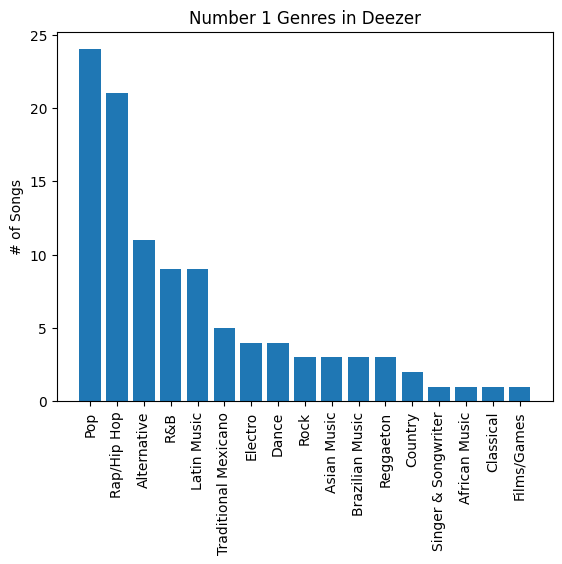

In [25]:
## Make a pie graph for deezer no 1 music genre
no1_deezer_genre= no1_deezer["Deezer Genre"].value_counts()
plt.bar(no1_deezer_genre.index,no1_deezer_genre)
plt.title("Number 1 Genres in Deezer")
plt.xticks(rotation=90)
plt.ylabel("# of Songs")
plt.savefig("output/Number 1 Genre in Deezer_Q1.png")
plt.show()

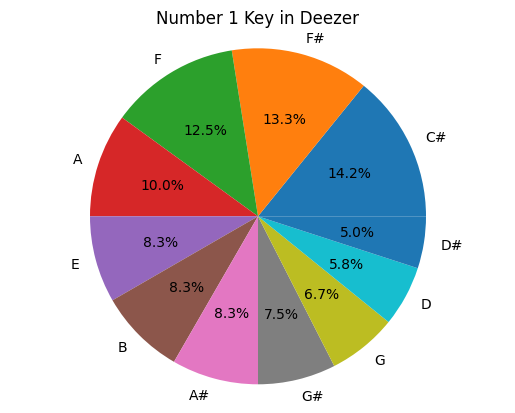

In [24]:
# Make a pie graph for deezer no 1 key
no1_deezer_key= no1_deezer["key"].value_counts()
plt.pie(no1_deezer_key, labels=no1_deezer_key.index, autopct='%1.1f%%')
plt.axis("equal")
plt.title("Number 1 Key in Deezer")
plt.savefig("output/Deezer Number Key_Q1.png")
plt.show()

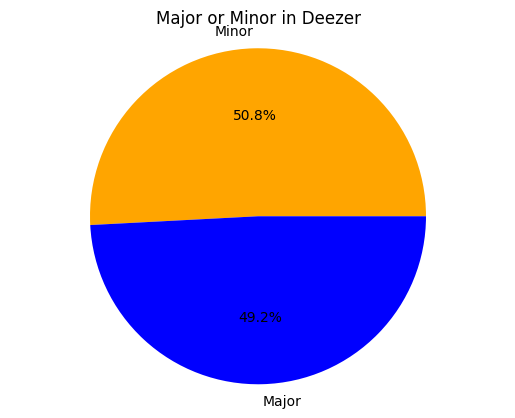

In [23]:
## Major or minor
no1_deezer_mode=no1_deezer["mode"].value_counts()
color=["orange","blue"]
plt.pie(no1_deezer_mode,labels=no1_deezer_mode.index,colors=color,autopct='%1.1f%%')
plt.axis("equal")
plt.title("Major or Minor in Deezer")
plt.savefig("output/Deezer Major or Minor_Q1.png")
plt.show()

In [20]:
## Make a list for Deezer bpm
dbpm_0to59=[]
dbpm_60to79=[]
dbpm_80to99=[]
dbpm_100to119=[]
dbpm_120to139=[]
dbpm_140to159=[]
dbpm_160to179=[]
dbpm_180to200=[]
for index, row in no1_deezer.iterrows():
    bpm = row['bpm']
    if bpm >= 0 and bpm <= 59:
        dbpm_0to59.append(row)
    elif bpm >= 60 and bpm <= 79:
        dbpm_60to79.append(row)
    elif bpm >= 80 and bpm <= 99:
        dbpm_80to99.append(row)
    elif bpm >= 100 and bpm <= 119:
        dbpm_100to119.append(row)
    elif bpm >= 120 and bpm <= 139:
        dbpm_120to139.append(row)
    elif bpm >= 140 and bpm <= 159:
        dbpm_140to159.append(row)
    elif bpm >= 160 and bpm <= 179:
        dbpm_160to179.append(row)
    elif bpm >= 180 and bpm <= 200:
        dbpm_180to200.append(row)
    

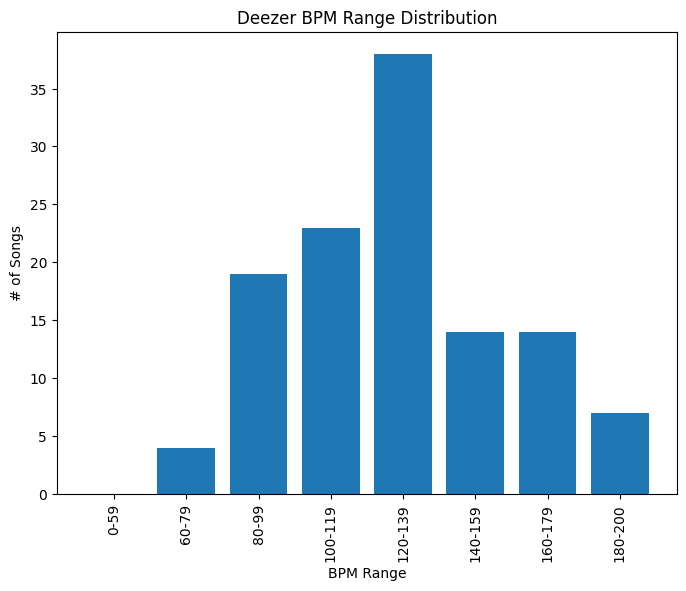

In [22]:
## Make a bar chart on the Deezer music bpm
bpm_ranges = ['0-59', '60-79', '80-99', '100-119', '120-139', '140-159', '160-179', '180-200']
counts = [len(dbpm_0to59), len(dbpm_60to79), len(dbpm_80to99), len(dbpm_100to119),
          len(dbpm_120to139), len(dbpm_140to159), len(dbpm_160to179), len(dbpm_180to200)]
plt.figure(figsize=(8, 6))
plt.bar(bpm_ranges, counts)
plt.xlabel("BPM Range")
plt.ylabel("# of Songs")
plt.title("Deezer BPM Range Distribution")
plt.xticks(rotation=90)
plt.savefig("output/Deezer BPM Range Distribution_Q1.png")
plt.show()

# Question 4

In [3]:
#make "Streams" an integer
music_df['streams'] = pd.to_numeric(music_df['streams'], errors='coerce')
music_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,Deezer Album ID,Deezer Genre
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,Major,80,89,83,31,0,8,4,463574485,Asian Music
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,Major,71,61,74,7,0,10,4,410083687,Rap/Hip Hop
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,Major,51,32,53,17,0,31,6,484372295,Pop
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,Major,55,58,72,11,0,11,15,108447472,Pop
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,Minor,65,23,80,14,63,11,6,442984025,Latin Music
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363.0,61,...,Major,60,24,39,57,0,8,3,372408897,Pop
813,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870.0,4,...,Major,42,7,24,83,1,12,6,368506677,Pop
814,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683.0,2,...,Major,80,81,67,4,0,8,6,382808197,Pop
815,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612.0,29,...,Major,82,67,77,8,0,12,5,367159307,Rap/Hip Hop


In [4]:
#songs from 23
music_23_df = music_df[music_df['released_year'] == 2023]
music_23_df = music_23_df.sort_values(by="streams", ascending=False)
music_23_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,Deezer Album ID,Deezer Genre
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112.0,34,...,Minor,67,83,76,48,0,8,3,418111007,Traditional Mexicano
117,"Shakira: Bzrp Music Sessions, Vol. 53","Shakira, Bizarrap",2,2023,1,11,5724,44,721975598.0,119,...,Minor,78,50,63,27,0,9,5,395194257,Latin Music
30,TQG,"Karol G, Shakira",2,2023,2,23,4284,49,618990393.0,115,...,Minor,72,61,63,67,0,9,28,408659277,Rap/Hip Hop
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067.0,49,...,Minor,81,56,48,21,0,8,33,382919757,Rap/Hip Hop
42,Die For You - Remix,"Ariana Grande, The Weeknd",2,2023,2,24,3408,47,518745108.0,87,...,Minor,53,50,53,23,0,44,7,14652356,R&B


In [5]:
#songs from 22
music_22_df = music_df[music_df['released_year'] == 2022]
music_22_df = music_22_df.sort_values(by="streams", ascending=False)
music_22_df.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,Deezer Album ID,Deezer Genre
73,Me Porto Bonito,"Chencho Corleone, Bad Bunny",2,2022,5,6,8870,43,1.440758e+09,104,...,Minor,91,43,71,9,0,9,8,316164367,Latin Music
61,"Quevedo: Bzrp Music Sessions, Vol. 52","Bizarrap, Quevedo",2,2022,7,6,8506,45,1.356565e+09,94,...,Major,62,55,78,1,3,23,4,332352037,Rap/Hip Hop
161,Titi Me Preguntï¿,Bad Bunny,1,2022,5,6,9037,42,1.264311e+09,124,...,Minor,65,19,72,10,0,13,25,316164367,Latin Music
64,Unholy (feat. Kim Petras),"Sam Smith, Kim Petras",2,2022,9,22,8576,42,1.230676e+09,216,...,Major,71,24,47,1,0,27,9,0,NaN
48,La Bachata,Manuel Turizo,1,2022,5,26,6804,45,1.214083e+09,139,...,Minor,84,85,68,58,0,22,4,319173587,Rap/Hip Hop
13,Kill Bill,SZA,1,2022,12,8,8109,77,1.163094e+09,183,...,Major,64,43,73,5,17,16,4,383703577,R&B
127,Ojitos Lindos,"Bomba Estï¿½ï¿½reo, Bad B",2,2022,5,6,6135,38,1.133866e+09,71,...,Minor,65,27,69,8,0,53,4,316164367,Latin Music
37,I'm Good (Blue),"Bebe Rexha, David Guetta",2,2022,8,26,12482,80,1.109433e+09,291,...,Minor,56,38,97,4,0,35,4,348202627,Dance
207,Efecto,Bad Bunny,1,2022,5,6,4004,33,1.047480e+09,34,...,Minor,80,23,48,14,0,6,5,316164367,Latin Music
29,Anti-Hero,Taylor Swift,1,2022,10,21,9082,56,9.997483e+08,242,...,Major,64,51,63,12,0,19,5,368474187,Pop


In [6]:
#all songs from before 2022:
music_prior_df = music_df[music_df['released_year'] < 2022]
music_prior_df = music_prior_df.sort_values(by="streams", ascending=False)
music_prior_df = music_prior_df.loc[music_prior_df["track_name"]!= "Love Grows (Where My Rosemary Goes)"]
music_prior_df.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,Deezer Album ID,Deezer Genre
151,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3.562544e+09,33,...,Minor,83,93,65,58,0,9,8,14996073,Pop
36,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2.808097e+09,372,...,Major,76,91,50,54,0,7,5,110040592,Rap/Hip Hop
137,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,2.713922e+09,433,...,Major,77,36,63,1,0,36,5,13082992,Rap/Hip Hop
71,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,2.665344e+09,492,...,Major,59,48,76,4,0,10,5,146920942,Pop
122,Believer,Imagine Dragons,1,2017,1,31,18986,23,2.594040e+09,250,...,Minor,77,74,78,4,0,23,11,68346981,Alternative
611,Closer,"The Chainsmokers, Halsey",2,2016,5,31,28032,0,2.591224e+09,315,...,Major,75,64,52,41,0,11,3,13680908,Electro
41,Starboy,"The Weeknd, Daft Punk",2,2016,9,21,29536,79,2.565530e+09,281,...,Major,68,49,59,16,0,13,28,14652356,R&B
120,Perfect,Ed Sheeran,1,2017,1,1,16596,13,2.559529e+09,7,...,Major,60,17,45,16,0,11,2,15478674,Pop
583,Seï¿½ï¿½o,"Shawn Mendes, Camila Cabello",2,2019,6,19,15010,2,2.484813e+09,453,...,Minor,76,77,52,4,0,8,3,0,NaN
283,Say You Won't Let Go,James Arthur,1,2016,9,9,15722,16,2.420461e+09,231,...,Major,40,45,56,69,0,9,5,13994984,Pop


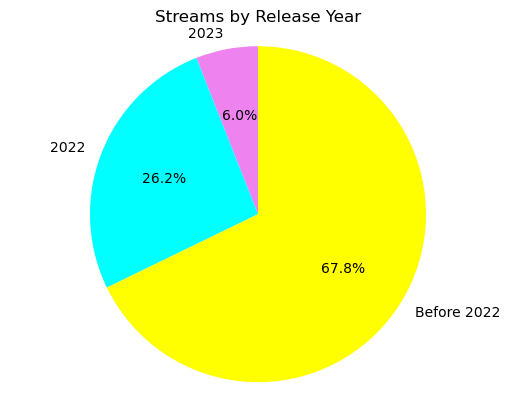

In [7]:
#pie chart of most popular songs in 2023 by release year:
popular23 = music_23_df["streams"].sum()
popular22 = music_22_df["streams"].sum()
popularprior = music_prior_df["streams"].sum()

#pie chart:
years = ["2023", "2022", "Before 2022"]
popular_music = [popular23, popular22, popularprior]
colors = ["violet", "cyan", "yellow"]

plt.title("Streams by Release Year")
plt.pie(popular_music, labels=years, colors=colors, autopct="%1.1f%%", startangle=90)
plt.axis("equal")
plt.savefig("output/Streams by Release Year.png")
plt.show()

In [8]:
#anova test for streams by year:
anova_result = stats.f_oneway(music_23_df["streams"],
                               music_22_df["streams"],
                               music_prior_df["streams"])
alpha = 0.05
if anova_result.pvalue <= alpha:
    print("There is a significant difference in streaming (aka popularity) between release years.")
else:
    print("There is no significant difference in streaming (aka popularity) between release years.")

# Print the ANOVA F-statistic and p-value
print("ANOVA F-statistic:", anova_result.statistic)
print("P-value:", anova_result.pvalue)


There is a significant difference in streaming (aka popularity) between release years.
ANOVA F-statistic: 217.7710701815086
P-value: 1.83613206144644e-76


            Deezer Genre  2023 streams
11           Rap/Hip Hop  5.300884e+09
1            Asian Music  3.331022e+09
9                    Pop  2.875129e+09
8            Latin Music  2.108739e+09
13  Traditional Mexicano  1.693726e+09
3                Country  9.115957e+08
10                   R&B  9.048627e+08
2        Brazilian Music  6.831887e+08
4                 Cumbia  5.056714e+08
5                  Dance  4.575794e+08
12             Reggaeton  4.308060e+08
0            Alternative  3.123859e+08
6                Electro  1.435738e+08
7                   Kids  1.231328e+08


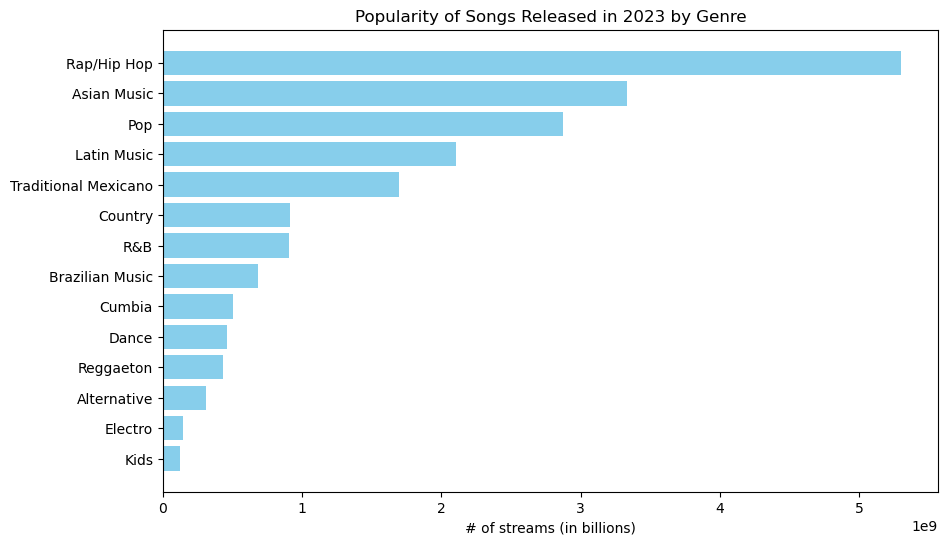

In [9]:
#plot 2023 songs by genre & streams:
genrepopular23_df = music_23_df[["Deezer Genre", "streams"]]
genrepopular23_df = genrepopular23_df.dropna(how='any')
groupedgenre23 = genrepopular23_df.groupby("Deezer Genre", as_index=False).sum()
groupedgenre23 = groupedgenre23.sort_values("streams", ascending=False)
groupedgenre23 = groupedgenre23.rename(columns={"streams": "2023 streams"})
print(groupedgenre23)

plt.figure(figsize=(10, 6))
plt.barh(groupedgenre23['Deezer Genre'], groupedgenre23['2023 streams'], color='skyblue')
plt.xlabel('# of streams (in billions)')
plt.title('Popularity of Songs Released in 2023 by Genre')
# Invert y-axis for better readability
plt.gca().invert_yaxis()  
plt.savefig("output/Popularity of Songs Released in 2023 by Genre.png")
plt.show()

            Deezer Genre  2022 streams
11                   Pop  2.735264e+10
13           Rap/Hip Hop  1.971394e+10
10           Latin Music  1.329452e+10
1            Alternative  4.955050e+09
7                  Dance  4.399960e+09
12                   R&B  4.371426e+09
2            Asian Music  4.312783e+09
14             Reggaeton  2.663520e+09
18  Traditional Mexicano  1.716406e+09
4        Brazilian Music  1.236861e+09
8                Electro  1.229864e+09
6                Country  1.169207e+09
15                  Rock  6.624728e+08
9            Films/Games  6.022286e+08
0          African Music  5.956107e+08
3          Banda/Grupero  3.197571e+08
16   Singer & Songwriter  2.847858e+08
17           Soul & Funk  2.440767e+08
5              Classical  2.091064e+08


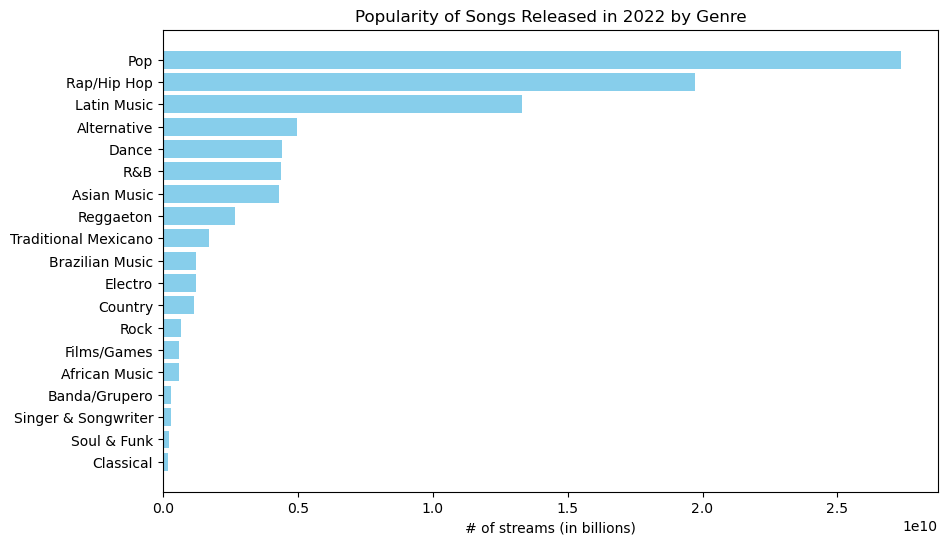

In [10]:
#plot 2022 songs by genre & streams:
genrepopular22_df = music_22_df[["Deezer Genre", "streams"]]
genrepopular22_df = genrepopular22_df.dropna(how='any')
genrepopular22_df
groupedgenre22 = genrepopular22_df.groupby("Deezer Genre", as_index=False).sum()
groupedgenre22 = groupedgenre22.sort_values("streams", ascending=False)
groupedgenre22 = groupedgenre22.rename(columns={"streams": "2022 streams"})
#groupedgenre22 = groupedgenre22.set_index("Deezer Genre")
print(groupedgenre22)

plt.figure(figsize=(10, 6))
plt.barh(groupedgenre22['Deezer Genre'], groupedgenre22['2022 streams'], color='skyblue')
plt.xlabel('# of streams (in billions)')
plt.title('Popularity of Songs Released in 2022 by Genre')
# Invert y-axis for better readability
plt.gca().invert_yaxis()  
plt.savefig("output/Popularity of Songs Released in 2022 by Genre.png")
plt.show()

           Deezer Genre  <2022 streams
13                  Pop   8.874217e+10
15          Rap/Hip Hop   3.794450e+10
1           Alternative   3.637354e+10
18                 Rock   1.796494e+10
14                  R&B   1.547817e+10
6                 Dance   8.530990e+09
7               Electro   8.004041e+09
17            Reggaeton   5.753932e+09
8           Films/Games   4.798387e+09
2           Asian Music   3.421334e+09
19  Singer & Songwriter   2.957269e+09
4             Classical   2.875754e+09
11          Latin Music   2.565355e+09
16               Reggae   9.568653e+08
0         African Music   8.093069e+08
5               Country   6.216610e+08
3             Christian   5.782079e+08
12                Metal   3.870802e+08
9                  Folk   2.448919e+08
10         Indian Music   1.832732e+08


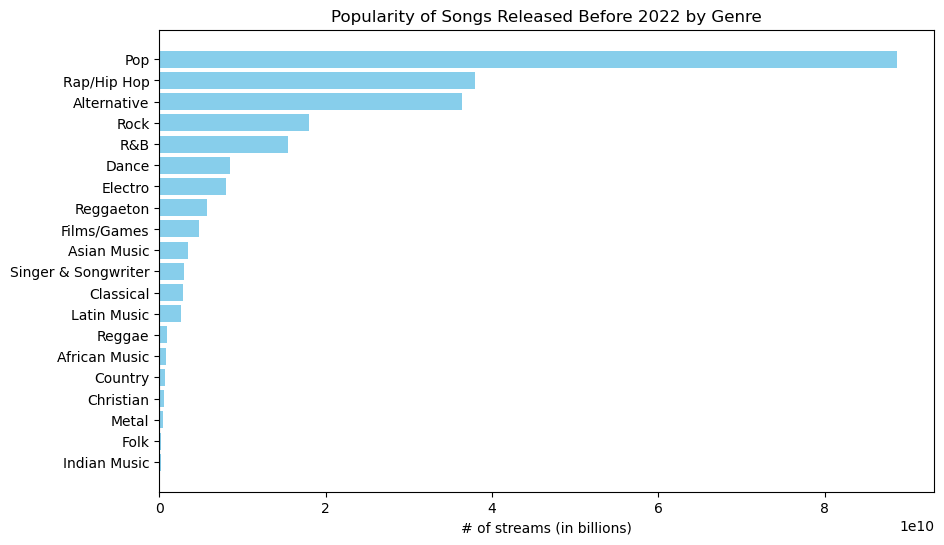

In [11]:
#plot <2022 songs by genre & streams:
genrepopularprior_df = music_prior_df[["Deezer Genre", "streams"]]
genrepopularprior_df = genrepopularprior_df.dropna(how='any')
groupedgenreprior = genrepopularprior_df.groupby("Deezer Genre", as_index=False).sum()
groupedgenreprior = groupedgenreprior.sort_values("streams", ascending=False)
groupedgenreprior = groupedgenreprior.rename(columns={"streams": "<2022 streams"})
#groupedgenreprior = groupedgenreprior.set_index("Deezer Genre")
print(groupedgenreprior)

plt.figure(figsize=(10, 6))
plt.barh(groupedgenreprior['Deezer Genre'], groupedgenreprior['<2022 streams'], color='skyblue')
plt.xlabel('# of streams (in billions)')
plt.title('Popularity of Songs Released Before 2022 by Genre')
# Invert y-axis for better readability
plt.gca().invert_yaxis()  
plt.savefig("output/Popularity of Songs Released Before 2022 by Genre.png")
plt.show()

In [12]:
anova_result = stats.f_oneway(groupedgenre23['2023 streams'],
                               groupedgenre22['2022 streams'],
                               groupedgenreprior['<2022 streams'])
alpha = 0.05
if anova_result.pvalue <= alpha:
    print("There is a significant difference in streaming (aka popularity) among genres in at least one of the years.")
else:
    print("There is no significant difference in streaming (aka popularity) scores among genres in any of the years.")

# Print the ANOVA F-statistic and p-value
print("ANOVA F-statistic:", anova_result.statistic)
print("P-value:", anova_result.pvalue)


There is no significant difference in streaming (aka popularity) scores among genres in any of the years.
ANOVA F-statistic: 2.657599566964205
P-value: 0.0800088639337745


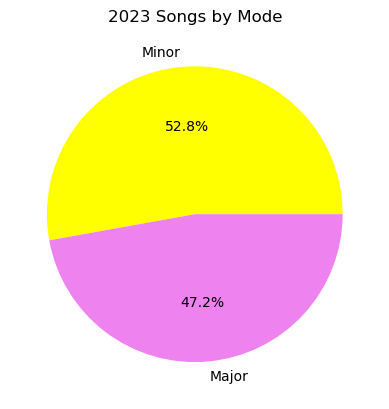

In [13]:
#plot 2023 songs by key:  key is a way musicians define the mood or emotional quality of a piece of music.
key23 = music_23_df["mode"].value_counts()
key23

plt.pie(key23, autopct='%1.1f%%', labels=key23.index, colors=['yellow','violet'])
plt.title('2023 Songs by Mode')

plt.savefig("output/Songs from 2023 by Mode.png")
plt.show()

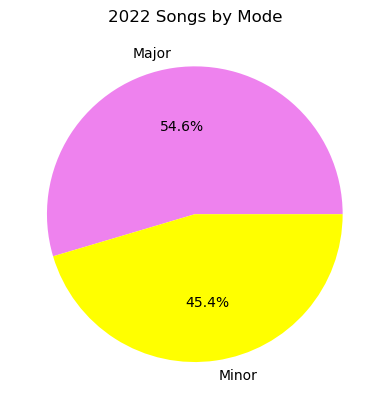

In [14]:
#plot 2022 songs by Key:  Key is a way musicians define the mood or emotional quality of a piece of music.
key22 = music_22_df["mode"].value_counts()
key22

plt.pie(key22, autopct='%1.1f%%', labels=key22.index, colors=['violet','yellow'])
plt.title('2022 Songs by Mode')

plt.savefig("output/Songs from 2022 by Mode.png")
plt.show()

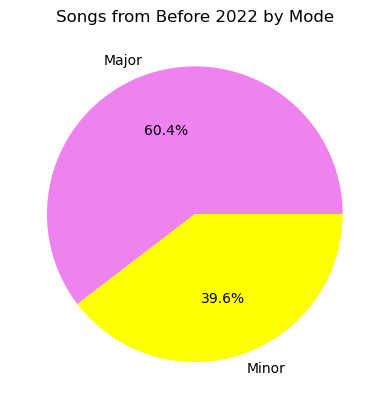

In [15]:
#plot songs before 2022 by Key:  Key is a way musicians define the mood or emotional quality of a piece of music.
keyprior = music_prior_df["mode"].value_counts()
keyprior

plt.pie(keyprior, autopct='%1.1f%%', labels=keyprior.index, colors=['violet', 'yellow'])
plt.title('Songs from Before 2022 by Mode')

plt.savefig("output/Songs from Before 2022 by Mode.png")
plt.show()

In [16]:
#chi test on all modes grouped by year
key23 = music_23_df["mode"].value_counts()
print(key23)
key22 = music_22_df["mode"].value_counts()
print(key22)
keyprior = music_prior_df["mode"].value_counts()
print(keyprior)
key_df = [[75, 84],[196, 163], [180, 118]]
chi2_stat, p_value, _, _ = stats.chi2_contingency(key_df)
alpha = 0.05
if p_value <= alpha:
    print("There is a significant association between key and year.")
else:
    print("There is no significant association between key and year.")

# Print the chi-squared statistic and p-value
print("Chi-squared Statistic:", chi2_stat)
print("P-value:", p_value)

mode
Minor    84
Major    75
Name: count, dtype: int64
mode
Major    196
Minor    163
Name: count, dtype: int64
mode
Major    180
Minor    118
Name: count, dtype: int64
There is a significant association between key and year.
Chi-squared Statistic: 7.461340403707916
P-value: 0.02397676118088346


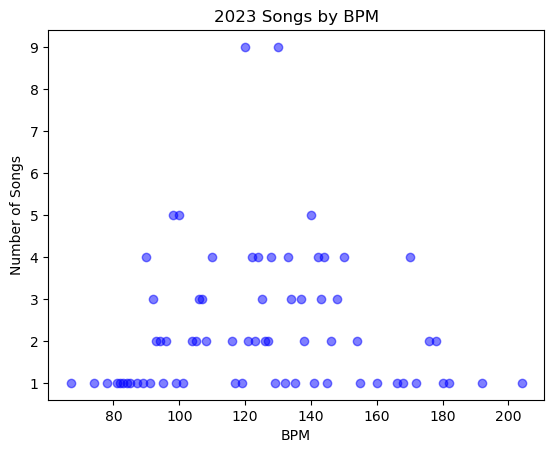

In [17]:
#plot 2023 songs by bpm: Scatter Plot
bpm23 = music_23_df["bpm"].value_counts()
bpm23

plt.scatter(bpm23.index, bpm23, marker='o', color='blue', alpha=0.5)
plt.title('2023 Songs by BPM')
plt.xlabel('BPM')
plt.ylabel('Number of Songs')

plt.savefig("output/Songs from 2023 by BPM.png")
plt.show()

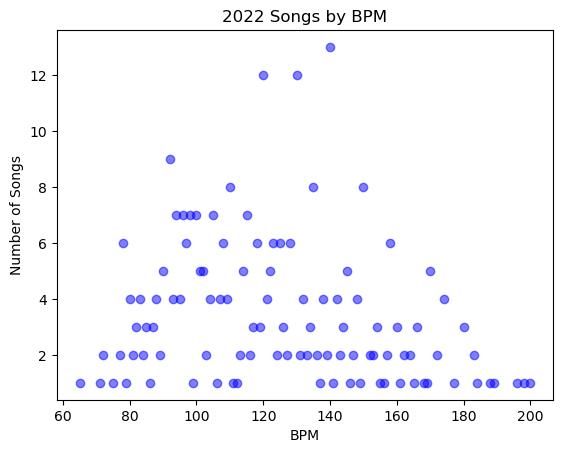

In [18]:
#plot 2022 songs by bpm: Scatter Plot
bpm22 = music_22_df["bpm"].value_counts()
bpm22

plt.scatter(bpm22.index, bpm22, marker='o', color='blue', alpha=0.5)
plt.title('2022 Songs by BPM')
plt.xlabel('BPM')
plt.ylabel('Number of Songs')

plt.savefig("output/Songs from 2022 by BPM.png")
plt.show()

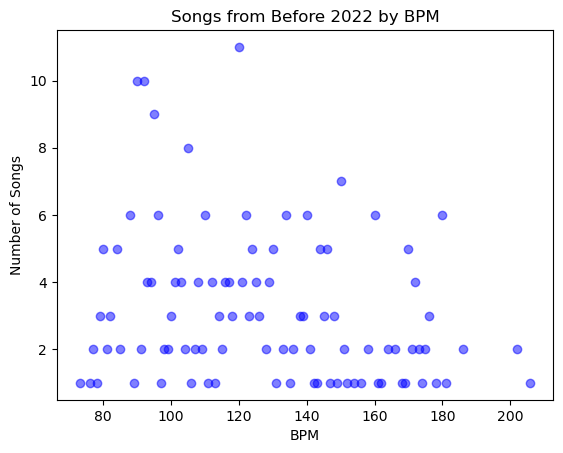

In [19]:
#plot 2023 songs by bpm: box Plot
bpm_prior = music_prior_df["bpm"].value_counts()
bpm_prior

plt.scatter(bpm_prior.index, bpm_prior, marker='o', color='blue', alpha=0.5)
plt.title('Songs from Before 2022 by BPM')
plt.xlabel('BPM')
plt.ylabel('Number of Songs')

plt.savefig("output/Songs from Before 2022 by BPM.png")
plt.show()

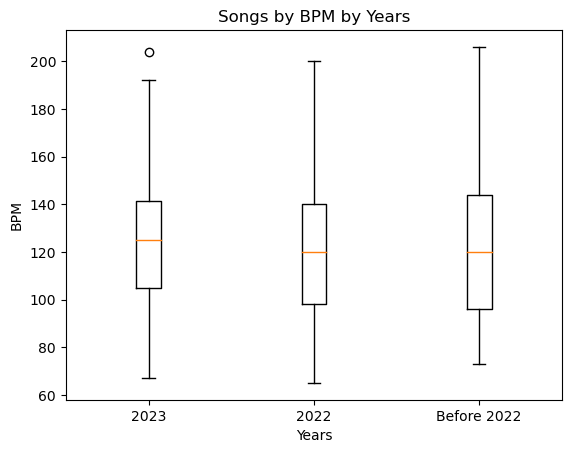

In [25]:
#plot 2023 songs by bpm: box Plot
bpm23 = music_23_df["bpm"]
bpm22 = music_22_df["bpm"]
bpm_prior = music_prior_df["bpm"]

fig, ax = plt.subplots()
boxplot23 = ax.boxplot(bpm23, positions=[1], labels=[2023])
boxplot22 = ax.boxplot(bpm22, positions=[2], labels=[2022])
boxplotprior = ax.boxplot(bpm_prior, positions=[3], labels=['Before 2022'])
ax.set_xlabel("Years")
ax.set_ylabel('BPM')
ax.set_title("Songs by BPM by Years")
plt.savefig("output/Songs by BPM by Years.png")
plt.show()

In [21]:
#pvalue of BPM in 23 v 22 tracks:

bpm23 = music_23_df["bpm"]
bpm22 = music_22_df["bpm"]
bpm_prior = music_prior_df["bpm"]
bpm_all = music_df["bpm"]

p_value = stats.ttest_ind(bpm23, bpm22)
print("P-value", p_value)

P-value TtestResult(statistic=1.3468456886572902, pvalue=0.1786211619365968, df=516.0)


In [22]:
#pvalue of BPM in 23 v prior tracks:

bpm23 = music_23_df["bpm"]
bpm22 = music_22_df["bpm"]
bpm_prior = music_prior_df["bpm"]
bpm_all = music_df["bpm"]

p_value = stats.ttest_ind(bpm23, bpm_prior)
print("P-value", p_value)

P-value TtestResult(statistic=0.8368221824968212, pvalue=0.403131814959101, df=455.0)


In [23]:
#pvalue of BPM in 23 v 22 tracks::

bpm23 = music_23_df["bpm"]
bpm22 = music_22_df["bpm"]
bpm_prior = music_prior_df["bpm"]
bpm_all = music_df["bpm"]

p_value = stats.ttest_ind(bpm22, bpm_prior)
print("P-value", p_value)

P-value TtestResult(statistic=-0.5121876196274204, pvalue=0.6086923596013655, df=655.0)


In [24]:
#merge dataframes
genre_streamed_merged = pd.merge(groupedgenre23, groupedgenre22, on="Deezer Genre", how="right")
genre_streamed_merged = pd.merge(genre_streamed_merged, groupedgenreprior, on="Deezer Genre", how="right")
#genre_streamed_merged.fillna(0, inplace=True)
genre_streamed_merged = genre_streamed_merged.dropna(how='any')
#genre_streamed_merged = genre_streamed_merged.set_index("Deezer Genre")
genre_streamed_merged

,Deezer Genre,2023 streams,2022 streams,<2022 streams
0,Pop,2.875129e+09,2.735264e+10,8.874217e+10
1,Rap/Hip Hop,5.300884e+09,1.971394e+10,3.794450e+10
2,Alternative,3.123859e+08,4.955050e+09,3.637354e+10
4,R&B,9.048627e+08,4.371426e+09,1.547817e+10
5,Dance,4.575794e+08,4.399960e+09,8.530990e+09
6,Electro,1.435738e+08,1.229864e+09,8.004041e+09
7,Reggaeton,4.308060e+08,2.663520e+09,5.753932e+09
9,Asian Music,3.331022e+09,4.312783e+09,3.421334e+09
12,Latin Music,2.108739e+09,1.329452e+10,2.565355e+09
15,Country,9.115957e+08,1.169207e+09,6.216610e+08
